In [1]:
# import libraries and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# import and read the data
df =pd.read_csv('penguins.csv')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
# clean data of nan values
df_clean = df.dropna(subset='sex')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


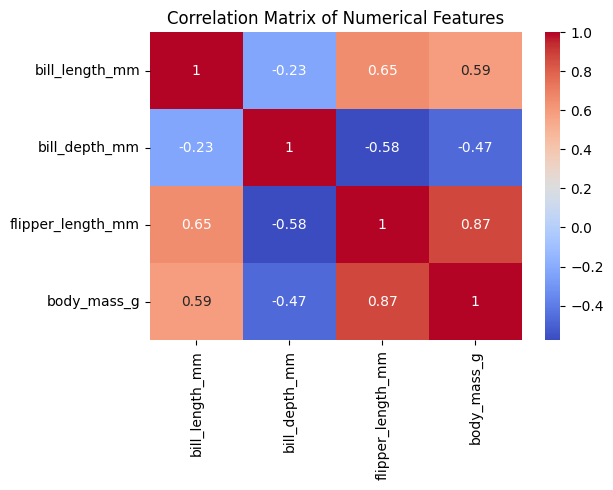

In [8]:
# select categorical data
df_cat = df_clean.select_dtypes(include=['object'])

# select numerical data
df_num = df_clean.select_dtypes(include=[np.number])

# check the correlation of numerical data
df_num.corr()
# plot the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [13]:

for columns in df_cat.columns:
    print(f'{columns} : {df_cat[columns].unique()}')

species : ['Adelie' 'Chinstrap' 'Gentoo']
island : ['Torgersen' 'Biscoe' 'Dream']
sex : ['MALE' 'FEMALE']


In [11]:
from scipy.stats import chi2_contingency

# Null Hypothesis: There is no association between the categorical variables.
# Alternative Hypothesis: There is an association between the categorical variables.

for columns in df_cat.columns:
    if columns != 'species':
        contingency_table = pd.crosstab(df_cat[columns], df_cat['species'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f'Chi-squared test for {columns}:\nChi2: {chi2}, p-value: {p}\n')
    
    
# Conclusion:
# If p-value < 0.05, reject the null hypothesis and conclude that there is a significant association between the variables.
# since p values are less than 0.05 for species and island, we can conclude that there is a significant association between species and island.
# since p value > 0.05 for sex, we fail to reject the null hypothesis that there is not significan association species and gender.

Chi-squared test for island:
Chi2: 284.5900126880923, p-value: 2.2818915409873682e-60

Chi-squared test for sex:
Chi2: 0.04860717014078319, p-value: 0.9759893689765846



island     Biscoe  Dream  Torgersen
species                            
Adelie         44     55         47
Chinstrap       0     68          0
Gentoo        119      0          0
island        Biscoe      Dream  Torgersen
species                                   
Adelie     71.465465  53.927928  20.606607
Chinstrap  33.285285  25.117117   9.597598
Gentoo     58.249249  43.954955  16.795796


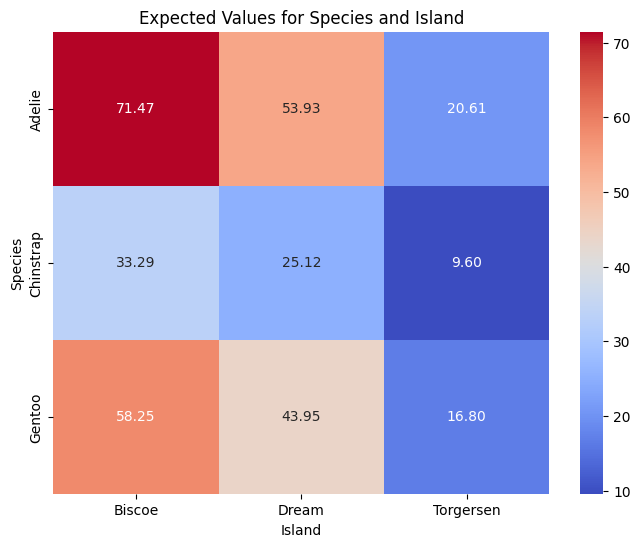

In [64]:
# plot of expected values for species and island
# chi-squared test for species and island takes the contingency table of species and island
# and calculates the expected values based on the observed frequencies.
# The expected values are then used to determine if there is a significant association between the two categorical variables.
# The expected values are calculated using the formula: (row total * column total) / grand total.

# The expected values are then compared to the observed values to determine if there is a significant difference between the two.
# The chi-squared test is used to determine if the observed values are significantly different from the expected values.
# The chi-squared test is reliant on categorical data, so it is important to ensure that the data is categorical before performing the test.

cont_species = pd.crosstab(df_cat['species'], df_cat['island']) 
print(cont_species)
chi2, p, dof, expected = chi2_contingency(cont_species)
expected_df = pd.DataFrame(expected, index=cont_species.index, columns=cont_species.columns)
print(expected_df)
plt.figure(figsize=(8, 6))
sns.heatmap(expected_df, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Expected Values for Species and Island')
plt.xlabel('Island')
plt.ylabel('Species')
plt.show()

In [ ]:
# conduct shapiro-wilk test for normality
from scipy.stats import shapiro

# Null Hypothesis: The data is normally distributed.
# Alternative Hypothesis: The data is not normally distributed.

# shapiro-wilk test is used to test the normality of the data for numerical data.
# if p-value < 0.05, reject the null hypothesis and conclude that the data is not normally distributed.
# if p-value > 0.05, fail to reject the null hypothesis and conclude that the data is normally distributed.
# since the data is not normally distributed, we can use non-parametric tests for hypothesis testing.

for columns in df_num.columns:
    stat, p = shapiro(df_num[columns])
    print(f'Shapiro-Wilk test for {columns}:\nStatistic: {stat}, p-value: {p}\n')

Shapiro-Wilk test for bill_length_mm:
Statistic: 0.9743413393122182, p-value: 1.189965972431551e-05

Shapiro-Wilk test for bill_depth_mm:
Statistic: 0.9732889335945742, p-value: 7.775968004513636e-06

Shapiro-Wilk test for flipper_length_mm:
Statistic: 0.951705230756506, p-value: 5.393184873708796e-09

Shapiro-Wilk test for body_mass_g:
Statistic: 0.9580123688127105, p-value: 3.567711408268874e-08



In [26]:
shapiro_test, pvalue = shapiro(df_clean[df_clean['species'] == 'Adelie']['flipper_length_mm'])
print(f'Shapiro-Wilk test for Adelie species:\nStatistic: {shapiro_test}, p-value: {pvalue}\n')

Shapiro-Wilk test for Adelie species:
Statistic: 0.9934049203703007, p-value: 0.7427425665590469



In [17]:
# conduct the levene's test for homogeneity of variance
from scipy.stats import levene
# Levene's test is used to test the homogeneity of variance for numerical data.
# Null Hypothesis: The variances are equal.
# Alternative Hypothesis: The variances are not equal.
# if p-value < 0.05, reject the null hypothesis and conclude that the variances are not equal.
# if p-value > 0.05, fail to reject the null hypothesis and conclude that the variances are equal.
# since the variances are not equal, we can use non-parametric tests for hypothesis testing.

for columns in df_num.columns:
    stat, p = levene(df_num[columns], df_num[columns])      
    print(f'Levene test for {columns}:\nStatistic: {stat}, p-value: {p}\n')

Levene test for bill_length_mm:
Statistic: 0.0, p-value: 1.0

Levene test for bill_depth_mm:
Statistic: 0.0, p-value: 1.0

Levene test for flipper_length_mm:
Statistic: 0.0, p-value: 1.0

Levene test for body_mass_g:
Statistic: 0.0, p-value: 1.0



In [ ]:
# Eventhough the data failed normality test, it passed the homogeneity of variance test.
# We should try using a non-parametric test to compare the means of the numerical data.
# The Kruskal-Wallis test is a non-parametric test that is used to compare the means of two or more groups.
# The Mann-Whitney U test is a non-parametric test that is used to compare the means of two groups.


# Mann Whitney U test for numerical data
from scipy.stats import mannwhitneyu

# Null Hypothesis: The two groups have the same distribution.
# Alternative Hypothesis: The two groups have different distributions.
# if p-value < 0.05, reject the null hypothesis and conclude that the three groups have different distributions.
# if p-value > 0.05, fail to reject the null hypothesis and conclude that the three groups have the same distribution.
# since the p-value is less than 0.05, we can conclude that the two groups have different distributions.

for columns in df_num.columns:
    p_values = []
    statistics = []
    
    for species in df_cat['species'].unique():
        group1 = df_num[df_cat['species'] == species][columns]
        group2 = df_num[df_cat['species'] != species][columns]
        stat, p = mannwhitneyu(group1, group2)
        statistics.append(stat)
        p_values.append(p)
        
        # dataframe = pd.DataFrame({'species':df_cat['species'].unique(), 'statistic':statistics, 'p_value':p_values})
        # dataframe = dataframe.set_index('species')
        # print(dataframe)
        
        # print(p_values)
        # print(statistics)
        
        print(f'Mann Whitney U test for {columns} and {species}:\nStatistic: {stat}, p-value: {p}\n')
# Kruskal-Wallis test for numerical data

Mann Whitney U test for bill_length_mm and Adelie:
Statistic: 316.0, p-value: 7.975117708946058e-53

Mann Whitney U test for bill_length_mm and Chinstrap:
Statistic: 14933.0, p-value: 6.114767746809981e-17

Mann Whitney U test for bill_length_mm and Gentoo:
Statistic: 20145.0, p-value: 1.3250995644233146e-18

Mann Whitney U test for bill_depth_mm and Adelie:
Statistic: 21826.0, p-value: 6.652310389689303e-21

Mann Whitney U test for bill_depth_mm and Chinstrap:
Statistic: 13245.0, p-value: 2.227254606141504e-09

Mann Whitney U test for bill_depth_mm and Gentoo:
Statistic: 323.0, p-value: 3.4362927057179996e-49

Mann Whitney U test for flipper_length_mm and Adelie:
Statistic: 2717.5, p-value: 4.075432826593624e-36

Mann Whitney U test for flipper_length_mm and Chinstrap:
Statistic: 7328.5, p-value: 0.01755935253968107

Mann Whitney U test for flipper_length_mm and Gentoo:
Statistic: 25348.0, p-value: 8.441211035076752e-51

Mann Whitney U test for body_mass_g and Adelie:
Statistic: 5068.

In [59]:
# interpretation - select the Adelie species from the categorical data and select only flipper length from the numerical data 
group11 = df_num[df_cat['species'] == 'Adelie']['flipper_length_mm']
# print(group11.shape)

group12 = df_num[df_cat['species'] == 'Chinstrap']['flipper_length_mm']
# print(group12.shape)

# apply man whitneyu test to the two groups
stat, p = mannwhitneyu(group11, group12)

# print statistics and p-values
print(f'Mann Whitney U test for Adelie and Chinstrap species:\nStatistic: {stat}, p-value: {p}\n')


Mann Whitney U test for Adelie and Chinstrap species:
Statistic: 2691.5, p-value: 6.851376281411792e-08



In [57]:
grroup13 = df_clean[df_clean['species'] == 'Adelie']['flipper_length_mm']
print(grroup13.shape)

gex = df_clean[(df_clean['species']).isin(['Adelie', 'Chinstrap'])]['flipper_length_mm']
print(gex)

(146,)
0      181.0
1      186.0
2      195.0
4      193.0
5      190.0
       ...  
215    207.0
216    202.0
217    193.0
218    210.0
219    198.0
Name: flipper_length_mm, Length: 214, dtype: float64


In [ ]:
for columns in df_num.columns:
    for species in df_cat['species'].unique():
        group1 = df_num[df_cat['species'] == species][columns]
        group2 = df_num[df_cat['species'] != species][columns]
   

0      39.1
1      39.5
2      40.3
4      36.7
5      39.3
       ... 
147    36.6
148    36.0
149    37.8
150    36.0
151    41.5
Name: bill_length_mm, Length: 146, dtype: float64 152    46.5
153    50.0
154    51.3
155    45.4
156    52.7
       ... 
338    47.2
340    46.8
341    50.4
342    45.2
343    49.9
Name: bill_length_mm, Length: 187, dtype: float64
152    46.5
153    50.0
154    51.3
155    45.4
156    52.7
       ... 
215    55.8
216    43.5
217    49.6
218    50.8
219    50.2
Name: bill_length_mm, Length: 68, dtype: float64 0      39.1
1      39.5
2      40.3
4      36.7
5      39.3
       ... 
338    47.2
340    46.8
341    50.4
342    45.2
343    49.9
Name: bill_length_mm, Length: 265, dtype: float64
220    46.1
221    50.0
222    48.7
223    50.0
224    47.6
       ... 
338    47.2
340    46.8
341    50.4
342    45.2
343    49.9
Name: bill_length_mm, Length: 119, dtype: float64 0      39.1
1      39.5
2      40.3
4      36.7
5      39.3
       ... 
215    55.8
216    

In [36]:
groupx = df_num[df_cat['species'] == 'Adelie']['bill_length_mm']
groupn = df_num[df_cat['species'] == 'Adelie']
groupz =df_num['bill_depth_mm']

print(groupx.shape)
print(groupn.shape)
print(groupz.shape)

(146,)
(146, 4)
(333,)


In [19]:
# Kruskal-Wallis test is a non-parametric test that is used to compare the means of two or more groups.
# Null Hypothesis: The two groups have the same distribution.
# Alternative Hypothesis: The two groups have different distributions.
# if p-value < 0.05, reject the null hypothesis and conclude that the two groups have different distributions.


from scipy.stats import kruskal
# Null Hypothesis: The two groups have the same distribution.
# Alternative Hypothesis: The two groups have different distributions.


for columns in df_num.columns:
    groups = [df_num[df_cat['species'] == species][columns] for species in df_cat['species'].unique()]
    stat, p = kruskal(*groups)
    print(f'Kruskal-Wallis test for {columns}:\nStatistic: {stat}, p-value: {p}\n')
    

Kruskal-Wallis test for bill_length_mm:
Statistic: 236.8992355590763, p-value: 3.6139705965512625e-52

Kruskal-Wallis test for bill_depth_mm:
Statistic: 217.55778444612224, p-value: 5.727002332271736e-48

Kruskal-Wallis test for flipper_length_mm:
Statistic: 237.34574750210166, p-value: 2.8908514688766915e-52

Kruskal-Wallis test for body_mass_g:
Statistic: 212.08513173193893, p-value: 8.836876744281847e-47



In [61]:
# conduct z-test for numerical data
from statsmodels.stats.weightstats import ztest

group11 = df_num[df_cat['species'] == 'Adelie']['flipper_length_mm']
# print(group11.shape)

group12 = df_num[df_cat['species'] == 'Chinstrap']['flipper_length_mm']
# print(group12.shape)

# apply man whitneyu test to the two groups
stat, p = ztest(group11, group12)

# print statistics and p-values
print(f'z-test for Adelie and Chinstrap species:\nStatistic: {stat}, p-value: {p}\n')

z-test for Adelie and Chinstrap species:
Statistic: -5.797900789295094, p-value: 6.715015542284308e-09

